##Loading Data

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1aw0kM5a4Q-bhbHyqK4Hl-tHrvxVpxpWm" -O 'election.csv' 

--2022-04-19 11:07:41--  https://drive.google.com/uc?export=download&id=1aw0kM5a4Q-bhbHyqK4Hl-tHrvxVpxpWm
Resolving drive.google.com (drive.google.com)... 173.194.196.102, 173.194.196.113, 173.194.196.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.196.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7b7vcb2oklns2dncvb07a93oi2upaar3/1650366450000/11121686744502963554/*/1aw0kM5a4Q-bhbHyqK4Hl-tHrvxVpxpWm?e=download [following]
--2022-04-19 11:07:42--  https://doc-04-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7b7vcb2oklns2dncvb07a93oi2upaar3/1650366450000/11121686744502963554/*/1aw0kM5a4Q-bhbHyqK4Hl-tHrvxVpxpWm?e=download
Resolving doc-04-3c-docs.googleusercontent.com (doc-04-3c-docs.googleusercontent.com)... 142.250.152.132, 2607:f8b0:4001:c56::84
Connecting to doc-04-3c-docs.googleusercontent.com (doc-04-3c

##Imporing Numpy and Pandas Libraries

In [ ]:
import numpy as np
import pandas as pd

##Transfering data to datframe and displaying heading of the data

In [ ]:
df = pd.read_csv("election.csv")
df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER


##Ploting a histogarm of the data based on "Year"

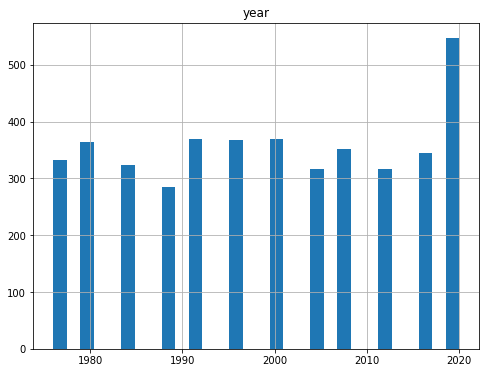

In [ ]:
df.hist(["year"], bins=30, figsize=(8, 6));

##Using shape attribute to get the number of rows and columns of the data. Here we have 15 columns and 4287 rows of data.

In [ ]:
shape = df.shape
shape

(4287, 15)

In [ ]:
df.describe()

,year,state_fips,state_cen,state_ic,candidatevotes,totalvotes,version,notes
count,4287.000000,4287.000000,4287.000000,4287.000000,4.287000e+03,4.287000e+03,4287.0,0.0
mean,1999.080942,28.616982,53.665034,39.754840,3.119076e+05,2.366924e+06,20210113.0,NaN
std,14.220014,15.616459,26.029189,22.772216,7.648011e+05,2.465008e+06,0.0,NaN
min,1976.000000,1.000000,11.000000,1.000000,0.000000e+00,1.235740e+05,20210113.0,NaN
25%,1988.000000,16.000000,33.000000,22.000000,1.177000e+03,6.522740e+05,20210113.0,NaN
50%,2000.000000,28.000000,53.000000,42.000000,7.499000e+03,1.569180e+06,20210113.0,NaN
75%,2012.000000,41.000000,81.000000,61.000000,1.992415e+05,3.033118e+06,20210113.0,NaN
max,2020.000000,56.000000,95.000000,82.000000,1.111025e+07,1.750088e+07,20210113.0,NaN


##Using dtypes attribute to get the types of datas


In [ ]:
df.dtypes

year                  int64
state                object
state_po             object
state_fips            int64
state_cen             int64
state_ic              int64
office               object
candidate            object
party_detailed       object
writein              object
candidatevotes        int64
totalvotes            int64
version               int64
notes               float64
party_simplified     object
dtype: object

##Dropping the non-numeric columns that we don't need in this data analyzing

In [ ]:
non_numaric = ['state','state_po','office','candidate','party_detailed']

df_numaric= df.drop(non_numaric,axis =1)
df_numaric.shape

(4287, 10)

##Finding if there is any Null values 






In [ ]:
df_numaric.isnull().sum()

year                   0
state_fips             0
state_cen              0
state_ic               0
writein                3
candidatevotes         0
totalvotes             0
version                0
notes               4287
party_simplified       0
dtype: int64

As you see in the above output,"notes" column contains as many missing values as rows(shows in "shape" attribute), meaning that it only contains missing values.<br> We are going to remove this column from our dataframe





In [ ]:
df_numaric.drop('notes',axis='columns', inplace=True)
df_numaric.shape

(4287, 9)

##Onehot encoding

First we use describe() and value_counts() function to get the description of the data and count of uniqe values of two "party_simplified" and "writein" column that we would like to onehot encode.

In [ ]:

df_numaric['party_simplified'].describe()


count      4287
unique        4
top       OTHER
freq       2524
Name: party_simplified, dtype: object

In [ ]:
df_numaric['party_simplified'].value_counts()

OTHER          2524
DEMOCRAT        615
REPUBLICAN      613
LIBERTARIAN     535
Name: party_simplified, dtype: int64

In [ ]:
df_numaric['writein'].describe()

count      4284
unique        2
top       False
freq       3807
Name: writein, dtype: object

In [ ]:
df_numaric['writein'].value_counts()


False    3807
True      477
Name: writein, dtype: int64

And the by using get_dummies() function in pandas, convert this categorical columns to dummies

In [ ]:
categorical_cols = ['writein', 'party_simplified'] 

df_numaric = pd.get_dummies(df_numaric, columns = categorical_cols)

By runing isnull() function again we chack and make sure that "df_numaric" datframe does not include any null value.

In [ ]:
df_numaric.isnull().any().any()

False

##Scaling the data using StandardScaler method to resize the distribution of the values and then fit and tranform the input data using fit_transform() method

In [ ]:
from sklearn.preprocessing import StandardScaler
df1 = StandardScaler().fit_transform(df_numaric)
df1

array([[-1.62332012, -1.76865978,  0.35867638, ..., -0.37761173,
        -1.19651602, -0.40847047],
       [-1.62332012, -1.76865978,  0.35867638, ..., -0.37761173,
        -1.19651602,  2.44815741],
       [-1.62332012, -1.76865978,  0.35867638, ..., -0.37761173,
         0.83575981, -0.40847047],
       ...,
       [ 1.47127125,  1.7536762 ,  1.12713418, ..., -0.37761173,
         0.83575981, -0.40847047],
       [ 1.47127125,  1.7536762 ,  1.12713418, ..., -0.37761173,
         0.83575981, -0.40847047],
       [ 1.47127125,  1.7536762 ,  1.12713418, ..., -0.37761173,
         0.83575981, -0.40847047]])

##Create 2 dimentional embeddings with t_SNE

In [ ]:
from sklearn import manifold
import seaborn as sns
import matplotlib.pyplot as plt
# from time import time


tsne = manifold.TSNE(n_components=2, init='pca',learning_rate=50, random_state=0)
X_tsne = tsne.fit_transform(df1)



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


As it shown below, we embedded the data to two diemntions successfully.

In [ ]:
X_tsne.shape

(4287, 2)

**Ploting the t_SNE**

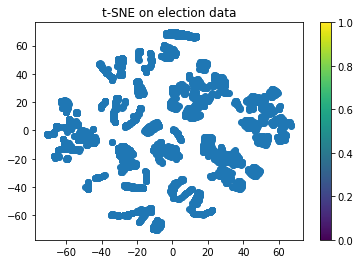

In [ ]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], cmap="tab10")
plt.title("t-SNE on election data")
plt.colorbar()
plt.show()

Color the markers by "candidatevotes"

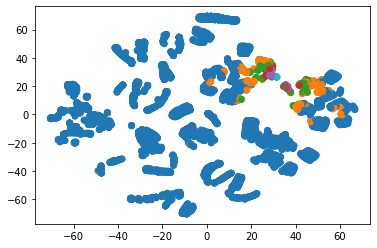

In [ ]:
target=[df["candidatevotes"]]
plt.scatter(X_tsne[:,0], X_tsne[:,1],c=target,cmap="tab10")

Color the markers by "totalvotes"

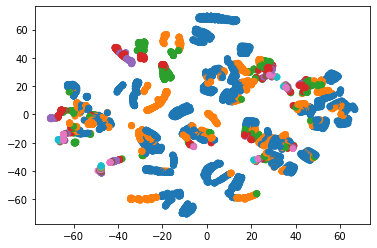

In [ ]:
target=[df["totalvotes"]]
plt.scatter(X_tsne[:,0], X_tsne[:,1],c=target,cmap="tab10")

Appended the x and y components identified by t-SNE to my original

In [ ]:
df["x_component"]=X_tsne[:,0]
df["y_component"]=X_tsne[:,1]

##DBSCAN


**Obtaining the number of two parameters "Min_smaple" and "Epsilon" **

***Min_sample:***

Generally the formula for finding the Min_sample is:

Min_sample = 2*(number of dimentions)

Since we here have a 2 Dimentional data, so we can use the default number 4, for this parameter.


***Epsilon(Eps):***

To find the value of Eps, we use the Nearest Neighbours to determine the distance between each data point and its nearest neighbor, then sort and visualize the results. From the plot we can pick out the greatest value at the curve of the graph.

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigb = NearestNeighbors(n_neighbors=2)
nbrs = neigb.fit(X_tsne)
distances,indices = nbrs.kneighbors(X_tsne)

<function matplotlib.pyplot.show>

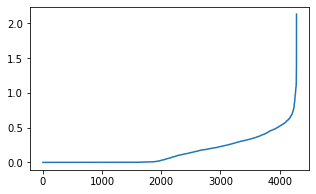

In [ ]:
distances= np.sort(distances,axis=0)
distances = distances[:,1]
plt.rcParams['figure.figsize']=(5,3)
plt.plot(distances)
plt.show

From the above plot, we can see that the maximum curvature of the curve is aproximatley 10, hence:

Eps= 10

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=10, min_samples=4).fit(X_tsne)
labels = dbscan.labels_

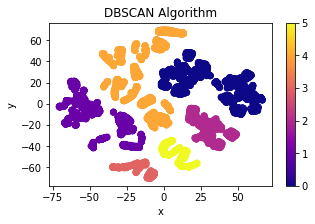

In [ ]:
plt.scatter(X_tsne[:,0],X_tsne[:,1], c=labels,cmap="plasma")
plt.title("DBSCAN Algorithm")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.show()

##What are the steps if dataset were "Big data"?


A source or sources, processing steps, and a destination are the three main aspects of a data pipeline.

1. Sources
Sources are where data comes from. Common sources include relational database management systems like MySQL, CRMs such as Salesforce and HubSpot, ERPs like SAP and Oracle, social media management tools, and even IoT device sensors.

2. Processing steps
In general, data is extracted data from sources, manipulated and changed according to business needs, and then deposited it at its destination. Common processing steps include transformation, augmentation, filtering, grouping, and aggregation.

3. Destination
A destination is where the data arrives at the end of its processing, typically a data lake or data warehouse for analysis.


So if the election data were a "Big data" here is some basic data preparation process that we would have need to go through.

Here is how we could have load the data with spark, and creating the dataframe.


```
df = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/masolhjoo@ibs-b.hu/1976_2020_president.csv")
```

We can inspect the dataframe by using printSchema function as below:


```
df.printSchema()
```


Showing data, it could be done by simple show() function, or we can add the vertical parameter for a better veiw:


```
df.show(1, vertical=True)
```


Other way to display the dataframe is using display() function:



```
df.display()
```



To claculate the number od rows(data) we use count() function:



```
df.count()
```



Next step is to find the null data in the dataframe, as an output of below code, we can see "Notes"column 4272 null values. 
```
from pyspark.sql.functions import col,isnan,when,count
df2 = df_filtered.select([count(when(col(c).contains('NA') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in df_filtered.columns])
df2.show()
```



Hence we can drop this column as well.


```
df_filtered= df_filtered.drop('notes')
df_filtered.display()
```



Now the only step that is left is to onehot encode the two "wrtein" and "party_simplified" columns.



```
import org.apache.spark.ml.feature.OneHotEncoderEstimator

val encoder = new OneHotEncoderEstimator()
  .setInputCols(Array("wrtein", "party_simplified"))
  .setOutputCols(Array("wrteinVec1", "party_simplifiedVec2"))
val model = encoder.fit(df_filtered)

val encoded = model.transform(df_filtered)
encoded.show()
```









The output "encoded", which is included our input featurs, is the data we can use to proceed with T_sne and modeling.